In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#to ignore the warning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Understanding the Dataset

In [3]:
#reading the dataset in python environment
data=pd.read_csv("salarydata.csv")

In [4]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.shape

(32561, 14)

In [6]:
#Statistical summary
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
#Information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


# Data Cleaning

In [8]:
#finding the null values
data.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

###### Above sum shows there are no null values in the dataset.

In [9]:
data.nunique()

age                73
workclass           9
education          16
education-num      16
marital-status      7
occupation         15
relationship        6
race                5
sex                 2
capital-gain      119
capital-loss       92
hours-per-week     94
native-country     42
salary              2
dtype: int64

In [10]:
for i in data:
    print(data[i].value_counts())
    print("-"*50)
    print("\n")

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
--------------------------------------------------


Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
--------------------------------------------------


HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
--------------------------------------------------


9     10501
10     7291
13     5355
14     1723
1

In [11]:
for i in data:
    print(i)
    print(data[i].unique())
    print("-"*50)
    print("\n")

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
--------------------------------------------------


workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
--------------------------------------------------


education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
--------------------------------------------------


education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
--------------------------------------------------


marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
--------------------------------------------------


oc

###### we see that there is a special character as " ?" for columns workcalss, Occupation, and native-country, we need to clean those data.

In [12]:
#Handling missing values
# the code will replace the special character to nan  
data['workclass'] = data['workclass'].replace('?',np.nan)
data['occupation'] = data['occupation'].replace('?',np.nan)
data['native-country'] = data['native-country'].replace('?',np.nan)

In [13]:
data.isnull().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [14]:
# we use mode to fill the missing value.

In [15]:
for i in ['workclass','occupation','native-country']:
    data[i]=data[i].fillna(data[i].mode()[0])

In [16]:
data.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

# Checking for duplicated entries

In [17]:
data[data.duplicated()]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
352,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
391,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
563,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
570,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
673,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32503,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
32512,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
32527,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


# Correlation

<AxesSubplot:>

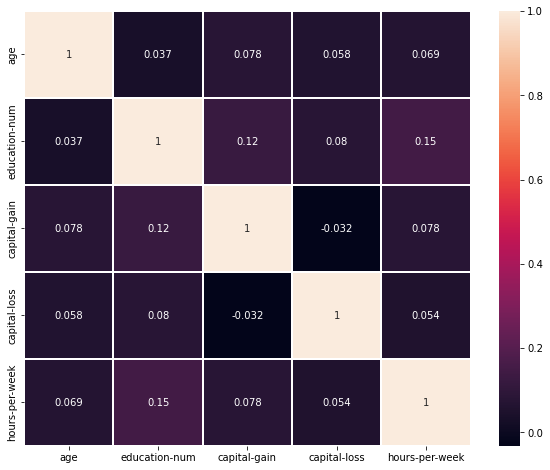

In [18]:
corrmatrix=data.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corrmatrix,linewidth=0.2,annot=True)

# Outlier Detection

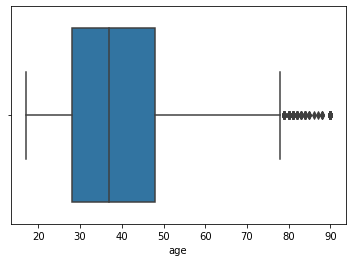

In [19]:

    sns.boxplot(data['age'])
    plt.show()  

# Handling Outliers with age

In [20]:
Q1=data['age'].quantile(0.25) # 25th quantile
Q3=data['age'].quantile(0.75)  # 75th quantile
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR 
Upper_Whisker = Q3 + 1.5*IQR
data['age'] = np.clip(data['age'], Lower_Whisker, Upper_Whisker) 




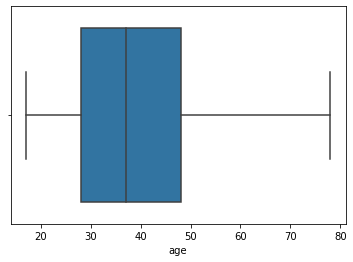

In [21]:
sns.boxplot(data['age'])
plt.show()

In [22]:
data=data.drop(['education-num','capital-gain','capital-loss','native-country'],axis=1)

###### separate the data as numeric and categorical so that our analysis becomes easy.

In [23]:
data_num =data.select_dtypes(['number'])
data_num

,age,hours-per-week
0,39.0,40
1,50.0,13
2,38.0,40
3,53.0,40
4,28.0,40
...,...,...
32556,27.0,38
32557,40.0,40
32558,58.0,40
32559,22.0,20


In [24]:
cat_data = data.select_dtypes(['object'])
cat_data

,workclass,education,marital-status,occupation,relationship,race,sex,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,<=50K
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,<=50K


# Univariate Analysis

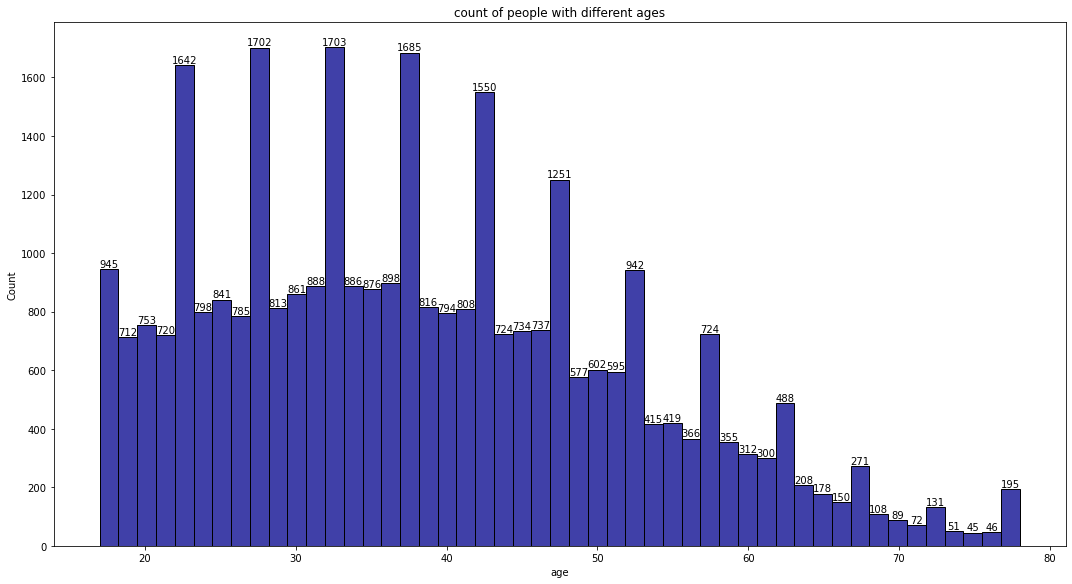

In [25]:
plt.figure(figsize=(15,8))
ax=sns.histplot(data['age'],color='darkblue')
for p in ax.patches: 
    ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()), ha='center', va='center', xytext=(0,5),textcoords='offset points')
plt.tight_layout()
plt.title('count of people with different ages')
plt.show()

we see that most peoples are in the range of 20- 40 years of age.

In [26]:
#we are defining a function for count plot
def labeled_countplot(a):
  ax=sns.countplot(x=data[a])
  total = len(data)
  for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()/2
    ax.annotate(percentage, (x,y), ha='center', va='center')
  plt.tight_layout()
  plt.show()
  return

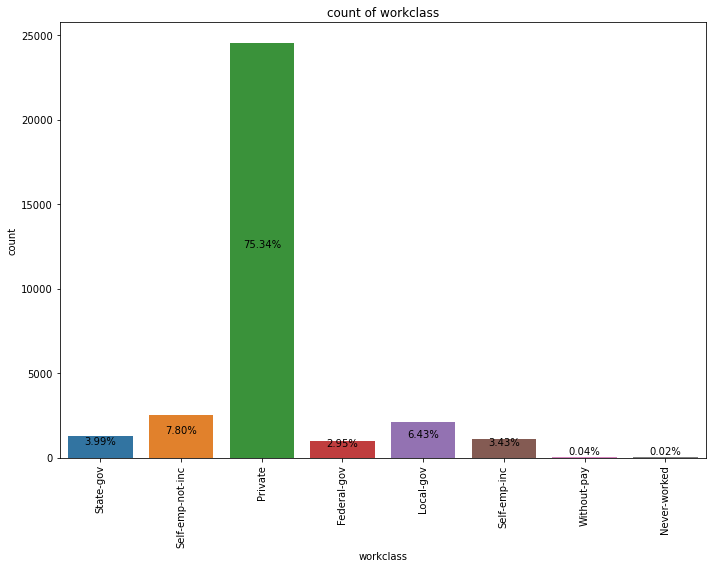

In [27]:
plt.figure(figsize=(10,8))
plt.title('count of workclass')
plt.xticks(rotation=90)
labeled_countplot('workclass')

We can see that 75% people are privately employed.

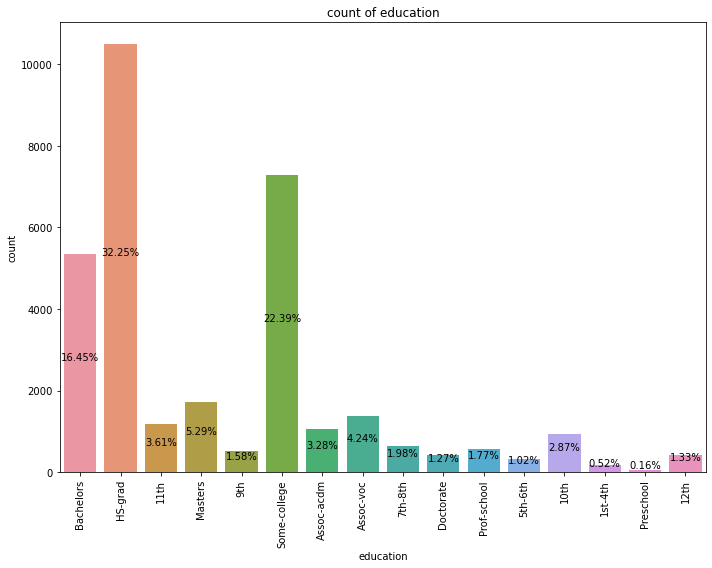

In [28]:
plt.figure(figsize=(10,8))
plt.title('count of education')
plt.xticks(rotation=90)
labeled_countplot('education')

Looking at the education, majority of people have completed high graduation, have attended college or have atleast completed masters.

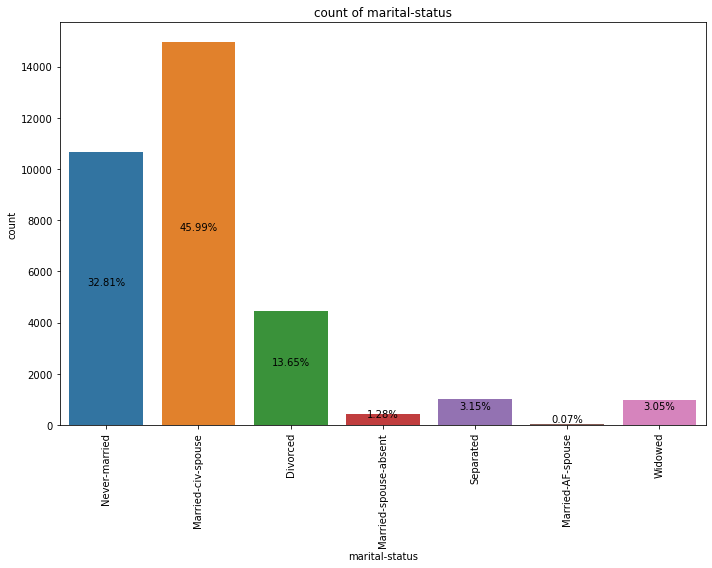

In [29]:
plt.figure(figsize=(10,8))
plt.title('count of marital-status')
plt.xticks(rotation=90)
labeled_countplot('marital-status')

Considering the marital status, 45.9% are married-civ-spouse and 32.8% are never married.

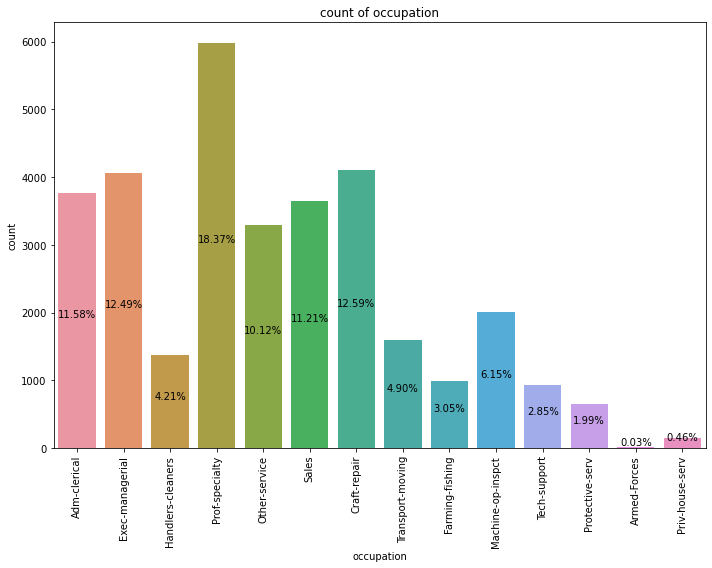

In [30]:
plt.figure(figsize=(10,8))
plt.title('count of occupation')
plt.xticks(rotation=90)
labeled_countplot('occupation')

Most of people are working as professional-speciality

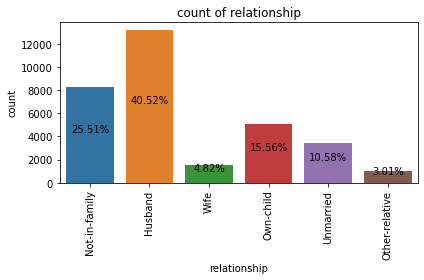

In [31]:
plt.title('count of relationship')
plt.xticks(rotation=90)
labeled_countplot('relationship')

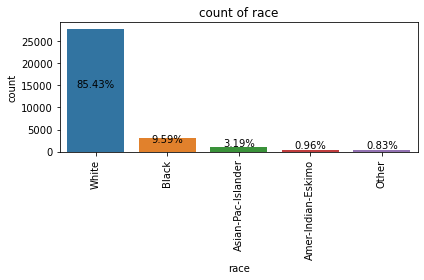

In [32]:
plt.title('count of race')
plt.xticks(rotation=90)
labeled_countplot('race')

considering race, 85.43% of people are white.

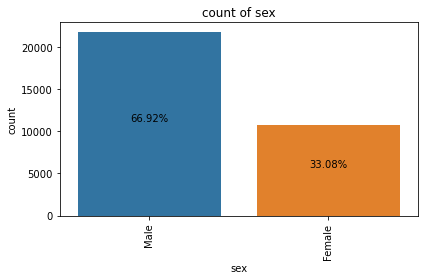

In [33]:
plt.title('count of sex')
plt.xticks(rotation=90)
labeled_countplot('sex')

66.92% of people are male and 33.08% are female

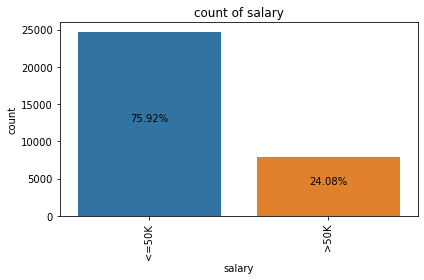

In [34]:
plt.title('count of salary')
plt.xticks(rotation=90)
labeled_countplot('salary')

25% people have salary above 50k and 75% below 50k, this indicated that we have imbalanced data.

# Bivariate Analysis

<AxesSubplot:xlabel='salary', ylabel='age'>

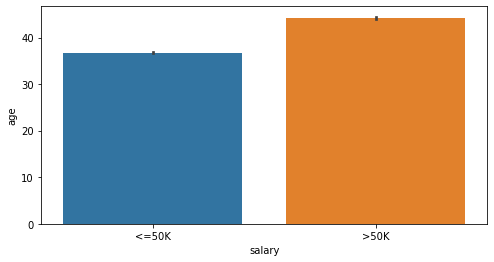

In [35]:
plt.figure(figsize=(8,4))
sns.barplot(x=data['salary'],y=data['age'])

<AxesSubplot:xlabel='salary', ylabel='hours-per-week'>

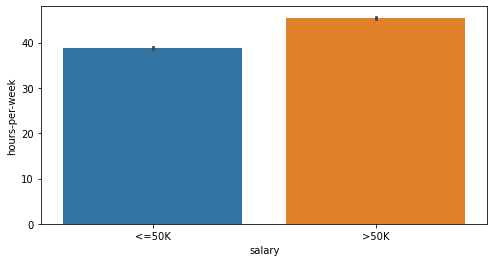

In [36]:
plt.figure(figsize=(8,4))
sns.barplot(x=data['salary'],y=data['hours-per-week'])

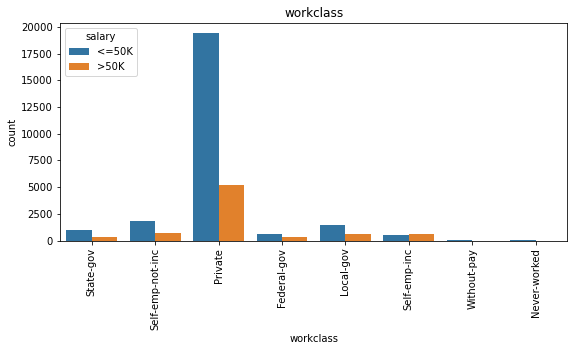

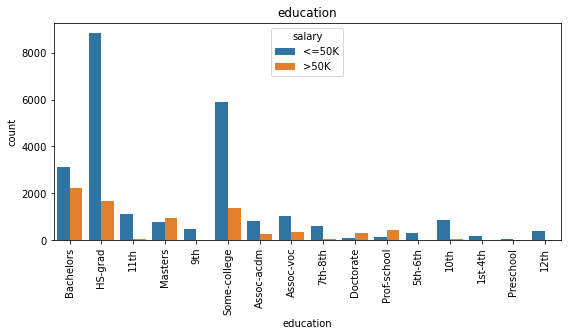

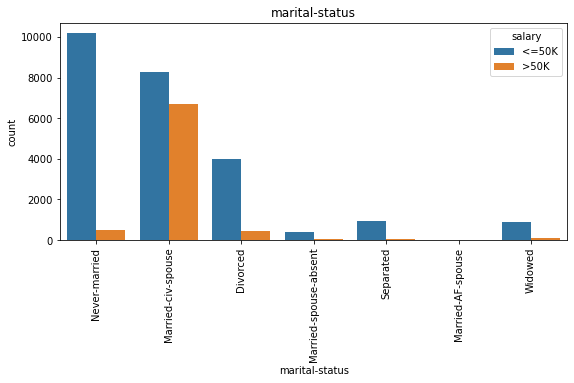

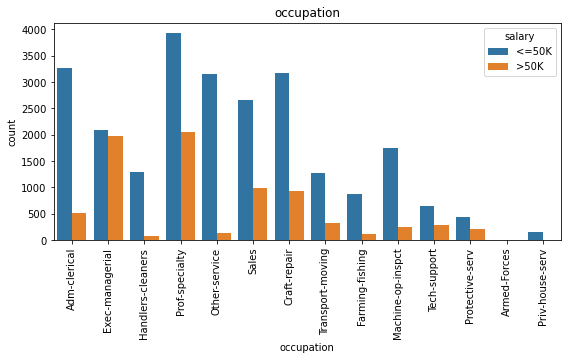

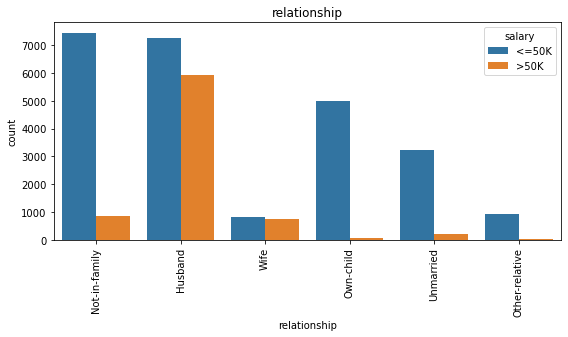

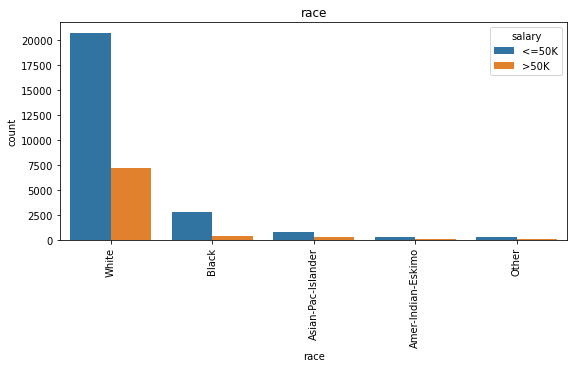

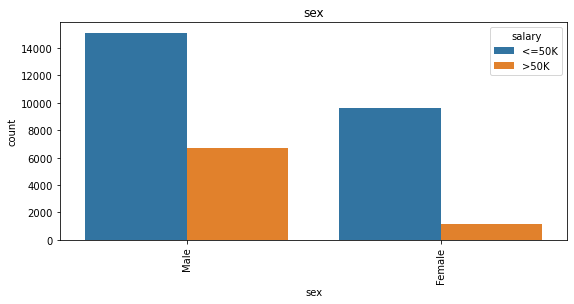

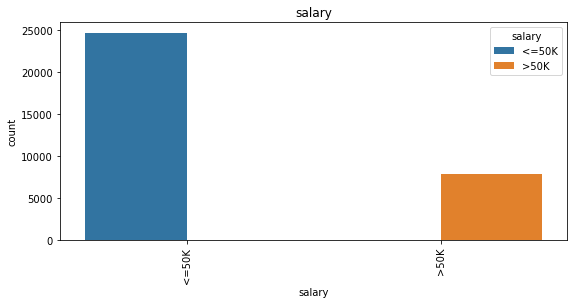

In [37]:
for column in cat_data:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(x=cat_data[column],hue=cat_data['salary'],data=cat_data)
    plt.title(column)    
    plt.xticks(rotation=90)

In [38]:
# Findings:

#People who are having income more than 50k are:

#In workclass,People who are privately employed, also self employed individuals having salary more than 50k.
#In education,masters and bachelors, also High school and college grads are having salary more than 50k.
#In marital status, people who are married are having salary more than 50k.
#Exec-managerial having salary more than 50k.
#In relationship husbands having salary more then 50k
#In race White people having salary more than 50k.
#In sex Males  having salary more than 50k.


In [39]:
data['salary']=data['salary'].replace(to_replace=('<=50K'), value=0)
data['salary']=data['salary'].replace(to_replace=('>50K'), value=1)

In [40]:
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,salary
0,39.0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,0
1,50.0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,0
2,38.0,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,0
3,53.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,0
4,28.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,0


# Preprocessing

In [41]:
data1= data

In [42]:
data1.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,salary
0,39.0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,0
1,50.0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,0
2,38.0,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,0
3,53.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,0
4,28.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,0


In [43]:
cat_cols1 =  data.select_dtypes(["object"])
cat_cols1.head()

,workclass,education,marital-status,occupation,relationship,race,sex
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female


### Label Encoding

In [44]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
for i in cat_cols1:
    cat_cols1[i]=label_encoder.fit_transform(cat_cols1[i])
    print(label_encoder.classes_)
cat_cols1.head()

['Federal-gov' 'Local-gov' 'Never-worked' 'Private' 'Self-emp-inc'
 'Self-emp-not-inc' 'State-gov' 'Without-pay']
['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm'
 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Preschool'
 'Prof-school' 'Some-college']
['Divorced' 'Married-AF-spouse' 'Married-civ-spouse'
 'Married-spouse-absent' 'Never-married' 'Separated' 'Widowed']
['Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales'
 'Tech-support' 'Transport-moving']
['Husband' 'Not-in-family' 'Other-relative' 'Own-child' 'Unmarried' 'Wife']
['Amer-Indian-Eskimo' 'Asian-Pac-Islander' 'Black' 'Other' 'White']
['Female' 'Male']


,workclass,education,marital-status,occupation,relationship,race,sex
0,6,9,4,0,1,4,1
1,5,9,2,3,0,4,1
2,3,11,0,5,1,4,1
3,3,1,2,5,0,2,1
4,3,9,2,9,5,2,0


# Normalization

In [45]:
#importing the preprocessing library and did normalization in numeric columns
from sklearn import preprocessing
data_num=preprocessing.normalize(data_num)

In [46]:
#converting array to dataframe
data_num=pd.DataFrame(data_num,columns=['age','hours-per-week'])

In [47]:
data_num.describe()

,age,hours-per-week
count,32561.000000,32561.000000
mean,0.669630,0.712911
std,0.140084,0.154050
min,0.188479,0.012819
25%,0.565528,0.640184
50%,0.668965,0.743294
75%,0.768221,0.824729
max,0.999918,0.982077


In [48]:
data1=data1.drop(['age', 'hours-per-week',
       'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race','sex'],axis=1)
data1.head()

,salary
0,0
1,0
2,0
3,0
4,0


In [49]:
#concatenating encoded, normalized and scaled data to original data
data1=pd.concat([cat_cols1,data1,data_num],axis=1)
data1.head()

,workclass,education,marital-status,occupation,relationship,race,sex,salary,age,hours-per-week
0,6,9,4,0,1,4,1,0,0.698100,0.716000
1,5,9,2,3,0,4,1,0,0.967823,0.251634
2,3,11,0,5,1,4,1,0,0.688749,0.724999
3,3,1,2,5,0,2,1,0,0.798189,0.602407
4,3,9,2,9,5,2,0,0,0.573462,0.819232


In [50]:
data1.shape

(32561, 10)

In [51]:
sum(data1.duplicated(data1.columns))

5199

In [52]:
data1 = data1.drop_duplicates(data1.columns, keep='last')

In [53]:
sum(data1.duplicated(data1.columns))

0

In [54]:
data1.shape

(27362, 10)

In [55]:
x=data1.drop(['salary'], axis=1)
y=data1['salary']

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
log_reg=LogisticRegression()
log_reg_model=log_reg.fit(x_train,y_train)
log_pred=log_reg_model.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score
print('confusion matrix is:\n', confusion_matrix(y_test,log_pred))
print('accuracy score is:\n', accuracy_score(y_test,log_pred))

confusion matrix is:
 [[4104   64]
 [1262   43]]
accuracy score is:
 0.7577197149643705


C:\Users\jaimo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
metric_k=[]
neighbors=range(3,15)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier=classifier.fit(x_train,y_train)
    y_pred_KNN=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred_KNN)
    metric_k.append(acc)

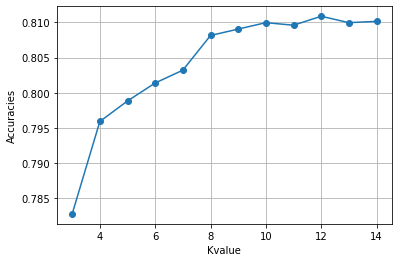

In [61]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('Kvalue')
plt.ylabel('Accuracies')
plt.grid()

In [62]:
classifier=KNeighborsClassifier(n_neighbors=12)
classifier=classifier.fit(x_train,y_train)
y_pred_KNN=classifier.predict(x_test)


In [63]:
confusion_matrix(y_test,y_pred_KNN)

array([[3804,  364],
       [ 671,  634]], dtype=int64)

In [64]:
accuracy_score(y_test,y_pred_KNN)

0.8108898227663073

# RandomForest

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf_clf=RandomForestClassifier()
rf_clf=rf_clf.fit(x_train,y_train)
y_pred_rf=rf_clf.predict(x_test)

In [67]:
confusion_matrix(y_test,y_pred_rf)

array([[3665,  503],
       [ 708,  597]], dtype=int64)

In [68]:
accuracy_score(y_test,y_pred_rf)

0.7787319568792253

In [69]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Bagging Classifier

In [70]:
bagging=BaggingClassifier(random_state=42)
bagging_model=bagging.fit(x_train,y_train)
bagging_pred=bagging_model.predict(x_test)

In [71]:

confusion_matrix(y_test,bagging_pred)

array([[3644,  524],
       [ 726,  579]], dtype=int64)

In [72]:
print('accuracy score is:\n',accuracy_score(y_test,bagging_pred))

accuracy score is:
 0.7716060661428833


# Ada Boost Classifier

In [73]:
# adaboost classifier
abc = AdaBoostClassifier(random_state=1)
abc_model=abc.fit(x_train,y_train)
abc_pred=abc_model.predict(x_test)

In [74]:
confusion_matrix(y_test,abc_pred)

array([[3810,  358],
       [ 651,  654]], dtype=int64)

In [75]:
print('accuracy score is:\n',accuracy_score(y_test,abc_pred))

accuracy score is:
 0.8156404165905353


# Decision Tree Classifier

In [76]:
dt_clf=DecisionTreeClassifier()
dt_clf=dt_clf.fit(x_train,y_train)
y_pred_dt=dt_clf.predict(x_test)

In [77]:
confusion_matrix(y_test,y_pred_dt)

array([[3497,  671],
       [ 724,  581]], dtype=int64)

In [78]:
print('accuracy score is:\n',accuracy_score(y_test,y_pred_dt))

accuracy score is:
 0.7451123698154577


# Gradient Boosting Classifier

In [79]:
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_model=gb_classifier.fit(x_train,y_train)
gb_pred=gb_model.predict(x_test)

In [80]:
confusion_matrix(y_test,gb_pred)

array([[3836,  332],
       [ 641,  664]], dtype=int64)

In [81]:
print('accuracy score is:\n',accuracy_score(y_test,gb_pred))

accuracy score is:
 0.8222181618856204


# XG Boost Classifier

In [82]:
xgb_classifier = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model=xgb_classifier.fit(x_train,y_train)
xgb_pred=xgb_model.predict(x_test)

In [83]:
confusion_matrix(y_test,xgb_pred)

array([[3771,  397],
       [ 585,  720]], dtype=int64)

In [84]:
print('accuracy score is:\n',accuracy_score(y_test,xgb_pred))

accuracy score is:
 0.820573725561849


# Model prediction Accuracy table

In [85]:
from tabulate import tabulate

In [86]:
table = [['Model', 'Accuracy'], ['Logistic Regression',75.77], ['KNN',81.08],['Decision tree',74.40],['Random Forest',78.14],['Bagging',77.16],['Ada boost',81.56],['Gradient',82.22],['XGB',82.05]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═════════════════════╤════════════╕
│ Model               │   Accuracy │
╞═════════════════════╪════════════╡
│ Logistic Regression │      75.77 │
├─────────────────────┼────────────┤
│ KNN                 │      81.08 │
├─────────────────────┼────────────┤
│ Decision tree       │      74.4  │
├─────────────────────┼────────────┤
│ Random Forest       │      78.14 │
├─────────────────────┼────────────┤
│ Bagging             │      77.16 │
├─────────────────────┼────────────┤
│ Ada boost           │      81.56 │
├─────────────────────┼────────────┤
│ Gradient            │      82.22 │
├─────────────────────┼────────────┤
│ XGB                 │      82.05 │
╘═════════════════════╧════════════╛


It can be inferred from the table summary that Gradient Boosting Classifier model gives best accuracy of 82.22 % while model training.

# HyperParameter Tuning

In [87]:
from sklearn.model_selection import RandomizedSearchCV

In [88]:
model=GradientBoostingClassifier()
parameters = {'learning_rate': [0.01,0.1,1,10,100],
            'n_estimators' : [5,50,250,500,1000,1250,1500,1750],
             'max_depth':[1,3,5,7,9]}

In [89]:
randm=RandomizedSearchCV(estimator=model,param_distributions=parameters,n_iter=10,n_jobs=-1,cv=2)
randm.fit(x_train,y_train)


RandomizedSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1, 10,
                                                          100],
                                        'max_depth': [1, 3, 5, 7, 9],
                                        'n_estimators': [5, 50, 250, 500, 1000,
                                                         1250, 1500, 1750]})

In [90]:
print("the best estimator across all searched params:",randm.best_estimator_)
print("The best score across all searched params:",randm.best_score_)
print("The best parameters across all searched params:",randm.best_params_)

the best estimator across all searched params: GradientBoostingClassifier(learning_rate=0.01, max_depth=9, n_estimators=1250)
The best score across all searched params: 0.8018640684816961
The best parameters across all searched params: {'n_estimators': 1250, 'max_depth': 9, 'learning_rate': 0.01}


In [91]:
gb_classifier1 = GradientBoostingClassifier(n_estimators= 1000, max_depth=3, learning_rate=0.1)
gb_model1=gb_classifier1.fit(x_train,y_train)
gb_pred1=gb_model1.predict(x_test)

In [92]:
confusion_matrix(y_test,gb_pred1)

array([[3784,  384],
       [ 573,  732]], dtype=int64)

In [93]:
print('accuracy score is:\n',accuracy_score(y_test,gb_pred1))

accuracy score is:
 0.8251416042389914


# XGB Classifier

In [94]:
model=XGBClassifier()
params = {
 'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
 'max_depth' : [1,3, 4, 5, 6,7, 8, 10, 12, 15],
 'min_child_weight': [1, 3, 5, 7],
 'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4,10 ],
 'colsample_bytree' : [ 0.3, 0.4, 0.5 ,0.7]
}

In [95]:
randm=RandomizedSearchCV(estimator=model,param_distributions=parameters,n_iter=10,n_jobs=-1,cv=2)
randm.fit(x_train,y_train)

RandomizedSearchCV(cv=2,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_to_onehot=None,
                            

In [96]:
print("the best estimator across all searched params:",randm.best_estimator_)
print("The best score across all searched params:",randm.best_score_)
print("The best parameters across all searched params:",randm.best_params_)

the best estimator across all searched params: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=1, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1500, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)
The best score across all searched params: 0.8240212893280865
The best parameters across all searched params: {'n_estimators': 1500, 'max_depth': 1, 'learning_rate': 1}


In [97]:
xgb_classifier1 = XGBClassifier(min_child_weight=7,max_depth=10,learning_rate=0.25,gamma=0.1,colsample_bytree=0.5)
xgb_model1=xgb_classifier1.fit(x_train,y_train)
xgb_pred1=xgb_model1.predict(x_test)

In [98]:
confusion_matrix(y_test,xgb_pred1)

array([[3789,  379],
       [ 589,  716]], dtype=int64)

In [99]:
print('accuracy score is:\n',accuracy_score(y_test,xgb_pred1))

accuracy score is:
 0.8231317376210487


# Model Prediction Accuracy table After tuning

In [100]:
table = [['Model', 'Accuracy'], ['Gradient',82.51],['XGB',82.31]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒══════════╤════════════╕
│ Model    │   Accuracy │
╞══════════╪════════════╡
│ Gradient │      82.51 │
├──────────┼────────────┤
│ XGB      │      82.31 │
╘══════════╧════════════╛


It can be inferred from the table summary that Gradient Boosting Classifier model gives best accuracy of 82.51% after hyperparameter tuning.
so that we finalized our ML model for predicting the salary using Gradient Boosting Classifier.